In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
import os
from ProteinSequenceEmbedder import ProteinSequenceEmbedder
from epitope_mask import get_epitope_mask

parent_dir = os.path.abspath('..')                # path to parent directory
data_dir = parent_dir + '/data'                   # path to datasets


## 2D Protein Maps (no mask)

/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


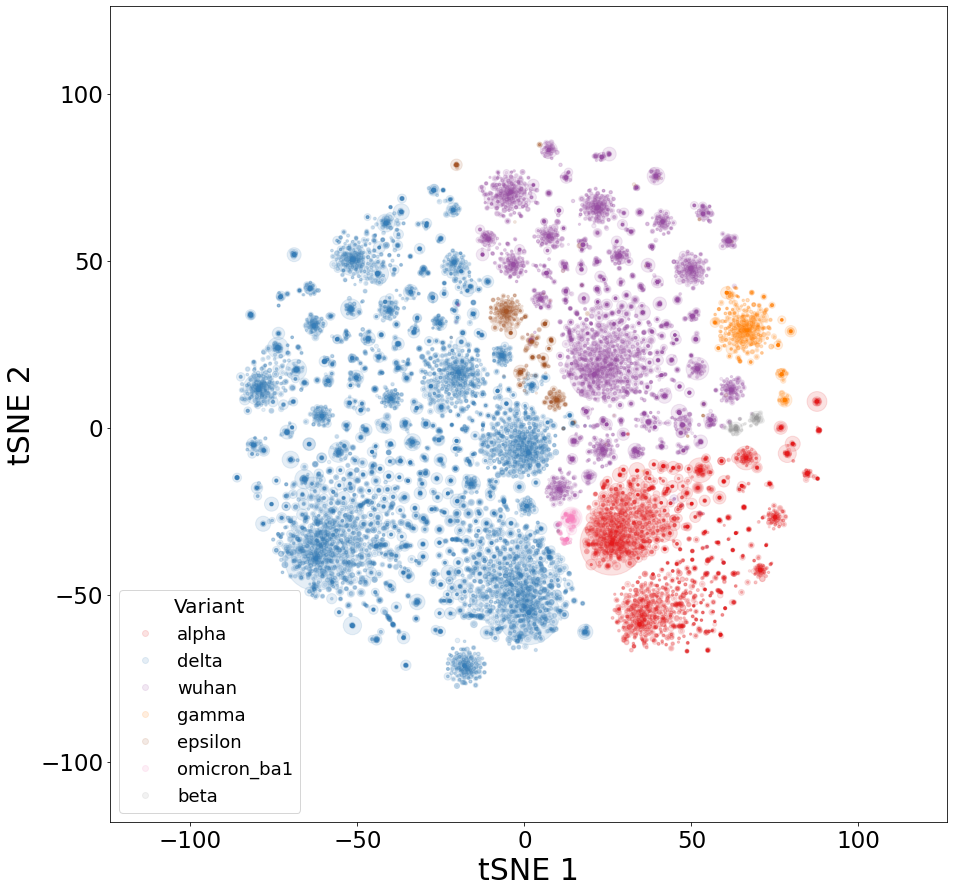

In [2]:
# Generates different maps using all combinations of encoding types and dimensionality reduction techniques

for method in ['tSNE']:
    for encoding_type in ['BLOSUM62']:
        embedder = ProteinSequenceEmbedder(encoding_type=encoding_type, embedding_type=method)
        embedder.generate_embedding_map(infile='half_of_training_data_trimmed.afa', marker_size=2, marker_size_power_scaling = 3.5, descriptor_number=2, color_map='Set1', save_image=True, hide_meta_data=True, axis_fontsize=23, axis_title_fontsize=30, legend_fontsize=18, legend_title_fontsize=20)

## 2D Protein Maps (with epitope mask)

/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


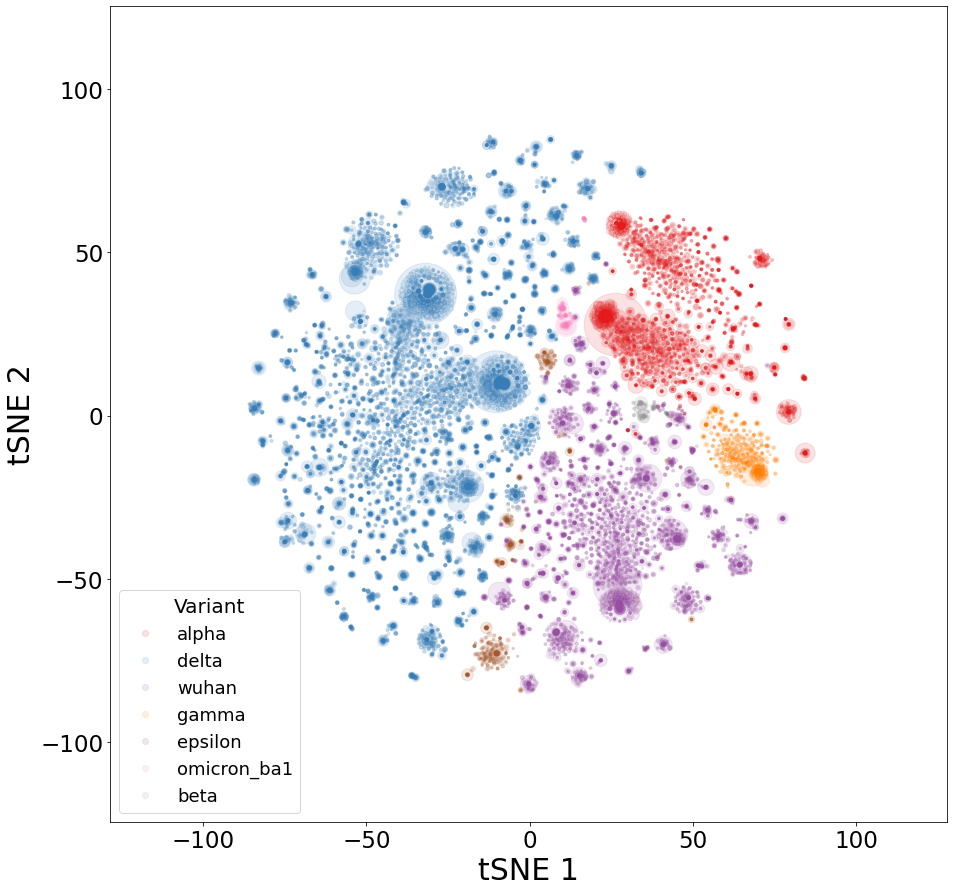

In [2]:
# generate the epitope mask
mask, reference_seq = get_epitope_mask(fasta_file='reference_spike.fasta',
                        dssp_file='reference_spike.dssp',
                        data_directory='../data/spike_protein_pdb/',
                        aligned_file='../data/spike_protein_sequences/half_of_training_data_trimmed.afa')

for method in ['tSNE']:
    for encoding_type in ['BLOSUM62']:
        embedder = ProteinSequenceEmbedder(encoding_type=encoding_type, embedding_type=method)
        embedder.generate_embedding_map(infile='half_of_training_data_trimmed.afa', mask=mask, marker_size=2, marker_size_power_scaling = 3.5, descriptor_number=2, color_map='Set1', save_image=True, hide_meta_data=True, axis_fontsize=23, axis_title_fontsize=30, legend_fontsize=18, legend_title_fontsize=20)

## 2D protein map of generated sequences

/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/dominic/PycharmProjects/VAE-SpikeProtein-Generation/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


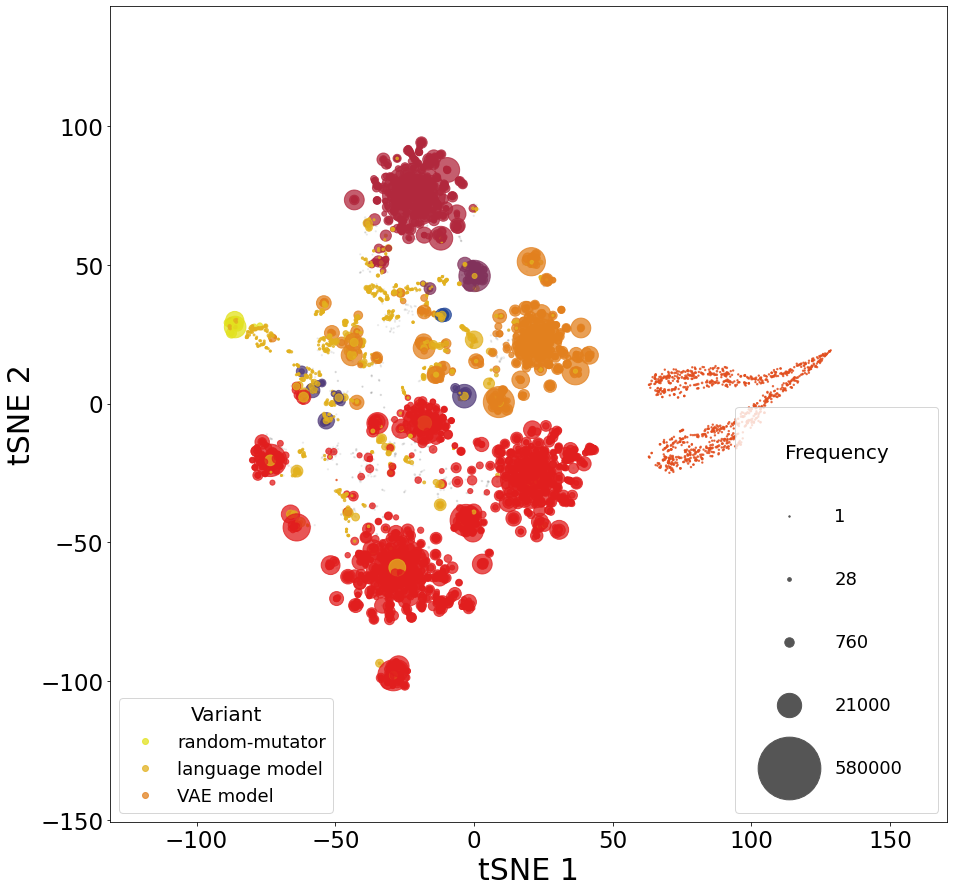

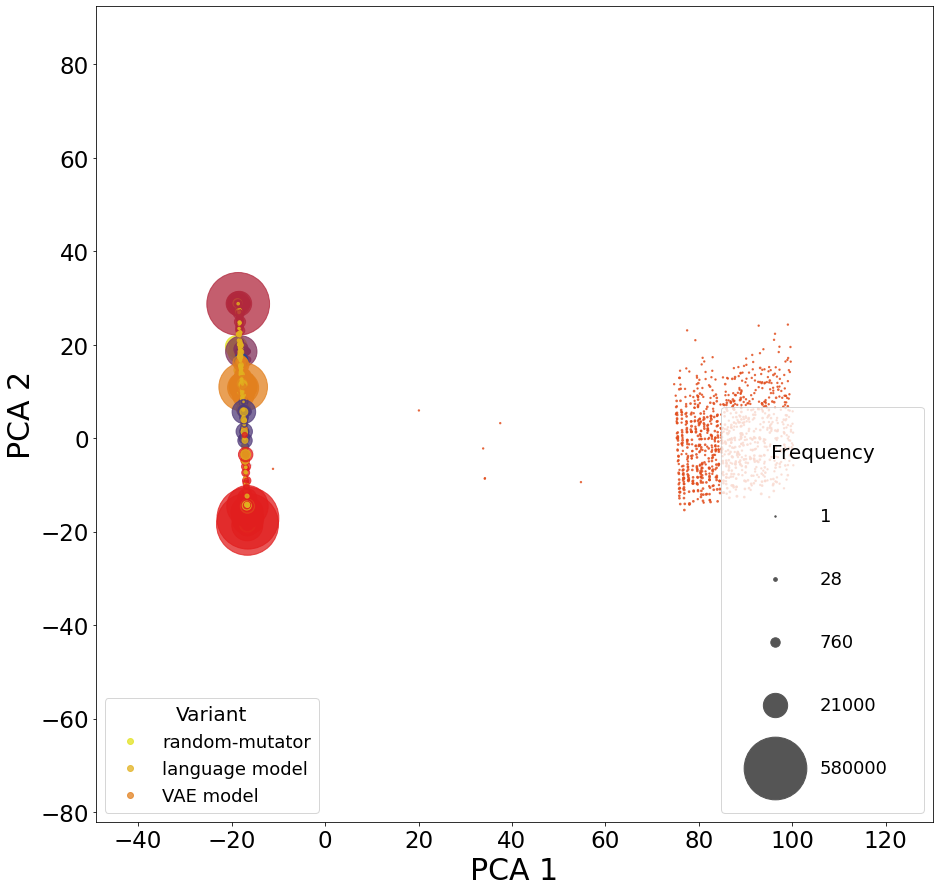

In [3]:
for method in ['tSNE', 'PCA']:
    for encoding_type in ['BLOSUM62']:
        embedder = ProteinSequenceEmbedder(encoding_type=encoding_type, embedding_type=method)
        embedder.generate_embedding_map(infile='gen_and_natural_visualisation_1.afa', marker_size=2, marker_size_power_scaling = 3.5, descriptor_number=3, color_map='Set1', save_image=True, hide_meta_data=True, axis_fontsize=23, axis_title_fontsize=30, legend_fontsize=18, legend_title_fontsize=20)

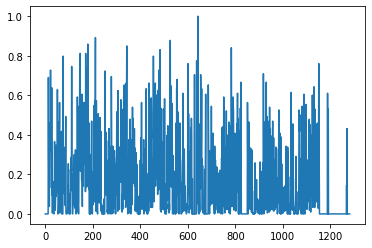

In [5]:
import matplotlib.pyplot as plt
plt.plot(mask)

## PCA percentage of variance explained with and without epitope mask

In [3]:
no_mask_explained_variances = dict()
with_mask_explained_variances = dict()

mask, reference_seq = get_epitope_mask(fasta_file='reference_spike.fasta',
                        dssp_file='reference_spike.dssp',
                        data_directory='../data/spike_protein_pdb/',
                        aligned_file='../data/spike_protein_sequences/1_in_500_cleaned_aligned.afa')

for encoding_type in ['One_hot', 'One_hot_6_bit', 'Binary_5_bit', 'Hydrophobicity_matrix',
                       'Meiler_parameters', 'Acthely_factors', 'PAM250', 'BLOSUM62', 'Miyazawa_energies',
                       'Micheletti_potentials', 'AESNN3', 'ANN4D', 'ProtVec']:
    
    embedder = ProteinSequenceEmbedder(encoding_type=encoding_type, embedding_type='PCA')
    descriptors, encoded_sequences = embedder._encode_sequences(infile='1_in_500_cleaned_aligned.afa',mask=None)
    sequence_embeddings, explained_variance = embedder.embed_with_PCA(encoded_sequences)
    
    no_mask_explained_variances[encoding_type] = explained_variance
    print(f'Done {encoding_type} without mask')
    
    embedder = ProteinSequenceEmbedder(encoding_type=encoding_type, embedding_type='PCA')
    descriptors, encoded_sequences = embedder._encode_sequences(infile='1_in_500_cleaned_aligned.afa',mask=mask)
    sequence_embeddings, explained_variance = embedder.embed_with_PCA(encoded_sequences)
    
    with_mask_explained_variances[encoding_type] = explained_variance
    print(f'Done {encoding_type} with mask')

Done One_hot without mask
Done One_hot with mask
Done One_hot_6_bit without mask
Done One_hot_6_bit with mask
Done Binary_5_bit without mask
Done Binary_5_bit with mask
Done Hydrophobicity_matrix without mask
Done Hydrophobicity_matrix with mask
Done Meiler_parameters without mask
Done Meiler_parameters with mask
Done Acthely_factors without mask
Done Acthely_factors with mask
Done PAM250 without mask
Done PAM250 with mask
Done BLOSUM62 without mask
Done BLOSUM62 with mask
Done Miyazawa_energies without mask
Done Miyazawa_energies with mask
Done Micheletti_potentials without mask
Done Micheletti_potentials with mask
Done AESNN3 without mask
Done AESNN3 with mask
Done ANN4D without mask
Done ANN4D with mask
Done ProtVec without mask
Done ProtVec with mask


In [4]:
no_mask_explained_variances

{'One_hot': array([0.40443805, 0.12584398]),
 'One_hot_6_bit': array([0.40431287, 0.13193031]),
 'Binary_5_bit': array([0.42836912, 0.13262525]),
 'Hydrophobicity_matrix': array([0.63741978, 0.10994896]),
 'Meiler_parameters': array([0.6255337 , 0.15199597]),
 'Acthely_factors': array([0.44016696, 0.10585624]),
 'PAM250': array([0.41820133, 0.11840066]),
 'BLOSUM62': array([0.42798158, 0.14225352]),
 'Miyazawa_energies': array([0.48203941, 0.1311031 ]),
 'Micheletti_potentials': array([0.1752379 , 0.16043116]),
 'AESNN3': array([0.37731087, 0.14081511]),
 'ANN4D': array([0.49563527, 0.17209757]),
 'ProtVec': array([0.39393312, 0.11718289])}

In [5]:
with_mask_explained_variances

{'One_hot': array([0.50781745, 0.09251856]),
 'One_hot_6_bit': array([0.54619692, 0.09652819]),
 'Binary_5_bit': array([0.51191804, 0.13002479]),
 'Hydrophobicity_matrix': array([0.63915203, 0.10849691]),
 'Meiler_parameters': array([0.62015779, 0.19600784]),
 'Acthely_factors': array([0.56574544, 0.10822487]),
 'PAM250': array([0.49395727, 0.15756034]),
 'BLOSUM62': array([0.50950208, 0.12861529]),
 'Miyazawa_energies': array([0.54078671, 0.14608919]),
 'Micheletti_potentials': array([0.60473218, 0.15665301]),
 'AESNN3': array([0.47979013, 0.10091276]),
 'ANN4D': array([0.56341073, 0.17148404]),
 'ProtVec': array([0.45538611, 0.13993711])}

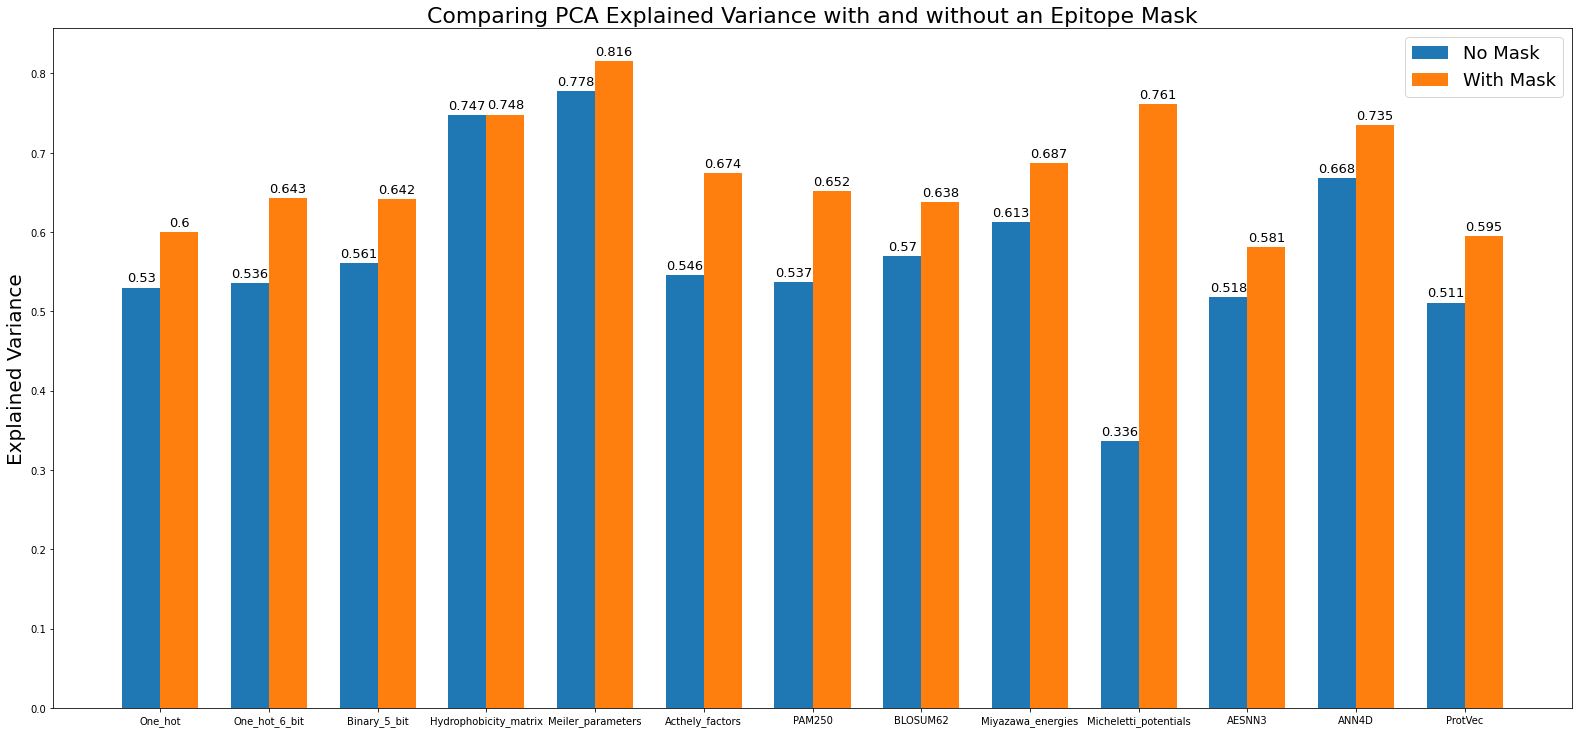

In [32]:
labels    = list(no_mask_explained_variances.keys())
no_mask   = [round(sum(array),3) for array in no_mask_explained_variances.values()]
with_mask = [round(sum(array),3) for array in with_mask_explained_variances.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_mask, width, label='No Mask')
rects2 = ax.bar(x + width/2, with_mask, width, label='With Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Explained Variance', fontsize=20)
ax.set_title('Comparing PCA Explained Variance with and without an Epitope Mask', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=18)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(25,12)

plt.show()

In [54]:
dimensions = 100
number_of_samples = 1000
_, explained_variance = embed_with_PCA(np.random.multivariate_normal(np.zeros(dimensions), np.eye(dimensions), size=number_of_samples))
print(explained_variance)

[0.01648891 0.01613347]


## Generated Sequences Epitope Maps

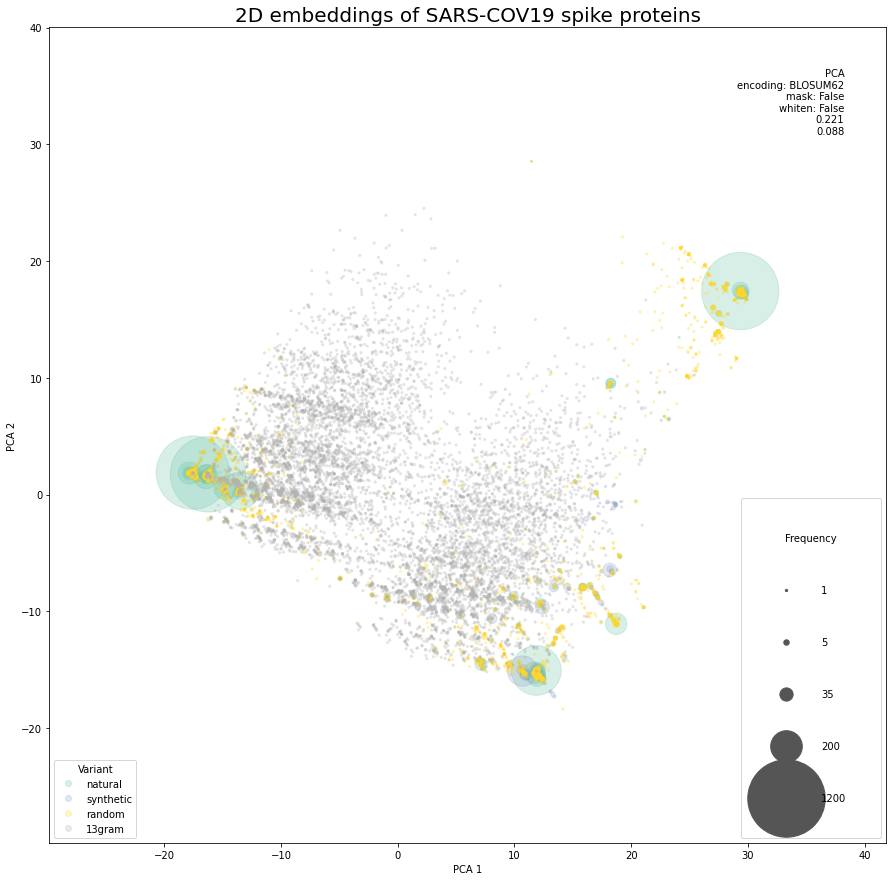

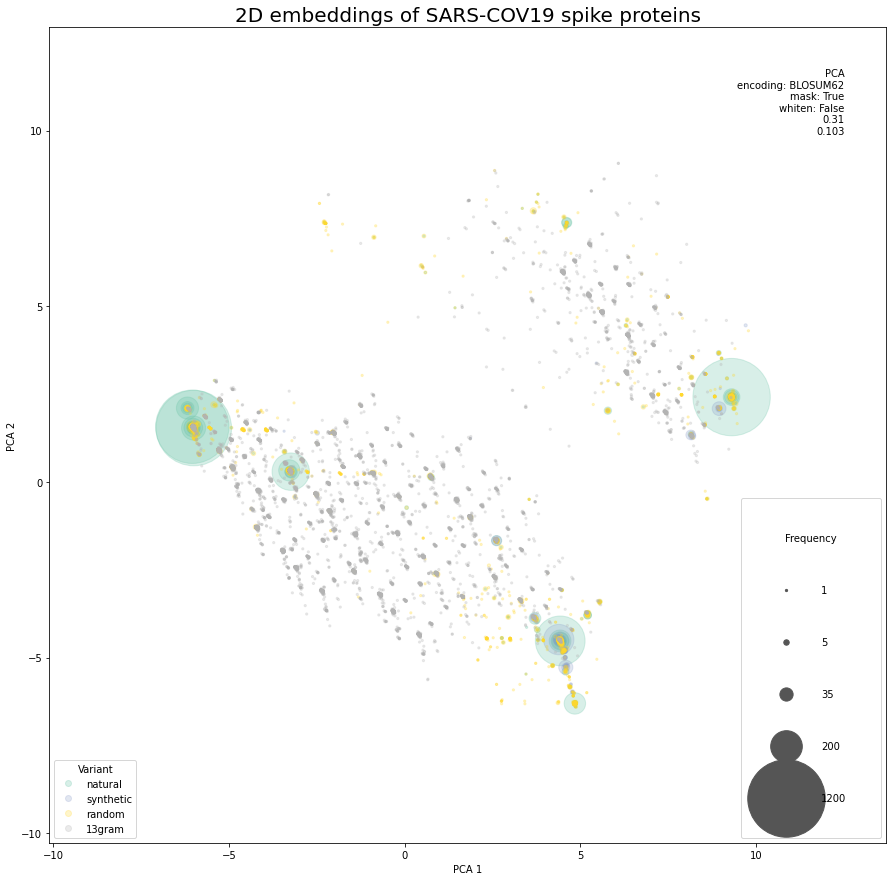

In [2]:
data_dir = "../data/spike_protein_sequences/"

embedder = ProteinSequenceEmbedder(encoding_type='BLOSUM62', embedding_type='PCA')

# without mask
embedder.generate_embedding_map(infile='combined,13,randSub.fasta', marker_size=5, descriptor_number=2)

mask, reference_seq = get_epitope_mask(fasta_file='reference_spike.fasta',
                                       dssp_file='reference_spike.dssp',
                                       data_directory='../data/spike_protein_pdb/',
                                       aligned_file='../data/spike_protein_sequences/1_in_500_cleaned_aligned.afa')

# with mask
embedder.generate_embedding_map(infile='combined,13,randSub.fasta', marker_size=5, mask=mask, descriptor_number=2)